# Computer Vision - Face Detection
In this hands-on project, the goal is to build a face detection model which includes building a face detector to locate the position of a face in an image.

#### Wider Face Dataset

Wider Face dataset is a face detection benchmark dataset, of which images are selected from the publicly available WIDER dataset. This data have 32,203 images and 393,703 faces are labeled with a high degree of variability in scale, pose and occlusion as depicted in the sample images.

In this project, we are using 409 images and around 1000 faces for ease of computation.

We will be using transfer learning on an already trained model to build our detector. We will perform transfer learning on Mobile Net model which is already trained to perform object detection. We will need to train the last 6-7 layers and freeze the remaining layers to train the model for face detection. To be able to train the Mobile Net model for face detection, we will be using WIDER FACE dataset which already has the bounding box data for various images with a single face and multiple faces. The output of the model is the bounding box data which gives the location of the face in an image. We learn to build a face detection model using Keras supported by Tensorflow.

#### Acknowledgement for the datasets

Acknowledgment for the datasets. http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/

Mobile Net paper: https://arxiv.org/pdf/1704.04861.pdf

#### Objective of the project

In this problem, we use "Transfer Learning" of an Object Detector model to detect any object according to the problem in hand. Here, we are particularly interested in detecting faces in a given image.

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

### Change current working directory to project folder (1 mark)

In [1]:
import os

os.chdir('C:\\Users\Sahil\Desktop\Computer Vision\Project')
print('Working directory changed!')

#verifying the current working directory
cwd = os.getcwd()
print('Current working directory: ', cwd)
import warnings
warnings.filterwarnings("ignore")

Working directory changed!
Current working directory:  C:\Users\Sahil\Desktop\Computer Vision\Project


### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
data = np.load('images.npy', allow_pickle = True)

#### Image loaded

[[[  4   0   1]
  [  0   3   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   2]
  [  5   1   2]]

 [[  0   2   1]
  [ 69  81  71]
  [ 72  79  71]
  ...
  [111 121 122]
  [113 122 121]
  [  0   0   0]]

 [[  0   0   0]
  [ 71  83  71]
  [ 70  81  67]
  ...
  [113 123 125]
  [114 122 124]
  [  0   0   0]]

 ...

 [[  0   3   0]
  [ 68  76  65]
  [ 67  78  62]
  ...
  [145 155 120]
  [133 143 106]
  [  0   1   3]]

 [[  1   1   0]
  [ 69  72  61]
  [ 67  73  59]
  ...
  [148 155 121]
  [137 145 104]
  [  0   1   3]]

 [[  1   1   3]
  [  1   1   1]
  [  0   0   2]
  ...
  [  0   0   0]
  [  0   0   2]
  [  0   0   0]]]


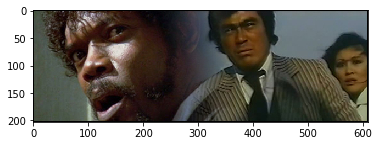

In [3]:
import matplotlib.pyplot as plt
import cv2
print(data[70][0])
plt.imshow(data[70][0])

#### Mask

In [4]:
data[70][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.05901639344262295, 'y': 0.04433497536945813},
   {'x': 0.460655737704918, 'y': 0.9753694581280788}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5131147540983606, 'y': 0.04926108374384237},
   {'x': 0.760655737704918, 'y': 0.5812807881773399}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8967213114754098, 'y': 0.2315270935960591},
   {'x': 1, 'y': 0.6600985221674877}],
  'imageWidth': 610,
  'imageHeight': 203}]

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [5]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [6]:
import tensorflow as tf
print('TensorFlow Version: ', tf.__version__)
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype = np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

TensorFlow Version:  2.1.0


### Print the shape of X_train and mask array  (1 mark)

In [7]:
print('Shape of X_train: ', X_train.shape)

Shape of X_train:  (409, 224, 224, 3)


In [8]:
print('Shape of mask array: ', masks.shape)

Shape of mask array:  (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

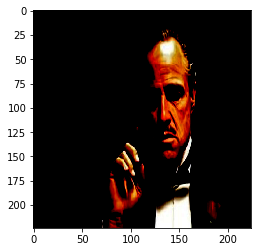

In [9]:
n = 10
print(X_train[n])
plt.imshow(X_train[n])

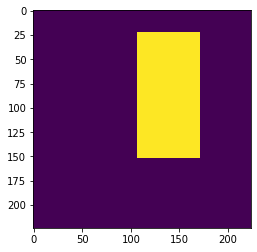

In [10]:
plt.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [11]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [12]:
def create_model(trainable = True):
    IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    model = MobileNet(input_shape = IMG_SHAPE, alpha = 1.0, include_top = False, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer('conv_pw_1_relu').output
    block1 = model.get_layer('conv_pw_3_relu').output
    block2 = model.get_layer('conv_pw_5_relu').output
    block3 = model.get_layer('conv_pw_11_relu').output
    block4 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size = 1, activation = "sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs = model.input, outputs = x)

### Call the create_model function

In [13]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [14]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [15]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [16]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [18]:
model.fit(X_train, masks, epochs = 10, batch_size = 1, validation_split = 0.1,  #splitting 10% of data into validation set          
                    callbacks = [checkpoint, reduce_lr, stop],
                    workers = 8,
                    use_multiprocessing = True,                    
                    verbose = 1)

Train on 368 samples, validate on 41 samples
Epoch 1/10

Epoch 00001: loss improved from inf to 5.12083, saving model to model-5.12.h5
  1/368 [..............................] - ETA: 47:58 - loss: 5.1208 - dice_coefficient: 0.0125
Epoch 00001: loss improved from 5.12083 to 2.65623, saving model to model-2.66.h5
  2/368 [..............................] - ETA: 36:02 - loss: 3.8885 - dice_coefficient: 0.0851
Epoch 00001: loss did not improve from 2.65623
  3/368 [..............................] - ETA: 31:54 - loss: 3.5888 - dice_coefficient: 0.0907
Epoch 00001: loss improved from 2.65623 to 1.61861, saving model to model-1.62.h5
  4/368 [..............................] - ETA: 30:05 - loss: 3.0963 - dice_coefficient: 0.1621
Epoch 00001: loss did not improve from 1.61861
  5/368 [..............................] - ETA: 28:49 - loss: 2.8459 - dice_coefficient: 0.1866
Epoch 00001: loss did not improve from 1.61861
  6/368 [..............................] - ETA: 27:59 - loss: 2.7022 - dice_coef

112/368 [========>.....................] - ETA: 16:59 - loss: 1.5191 - dice_coefficient: 0.3937
Epoch 00001: loss did not improve from 0.49285
113/368 [========>.....................] - ETA: 16:55 - loss: 1.5148 - dice_coefficient: 0.3950
Epoch 00001: loss improved from 0.49285 to 0.48311, saving model to model-0.48.h5
114/368 [========>.....................] - ETA: 16:51 - loss: 1.5057 - dice_coefficient: 0.3981
Epoch 00001: loss did not improve from 0.48311
115/368 [========>.....................] - ETA: 16:47 - loss: 1.5031 - dice_coefficient: 0.3978
Epoch 00001: loss did not improve from 0.48311
116/368 [========>.....................] - ETA: 16:43 - loss: 1.5016 - dice_coefficient: 0.3976
Epoch 00001: loss did not improve from 0.48311
117/368 [========>.....................] - ETA: 16:38 - loss: 1.4952 - dice_coefficient: 0.3991
Epoch 00001: loss did not improve from 0.48311
118/368 [========>.....................] - ETA: 16:34 - loss: 1.4950 - dice_coefficient: 0.3988
Epoch 00001

226/368 [=================>............] - ETA: 9:19 - loss: 1.4687 - dice_coefficient: 0.4199
Epoch 00001: loss did not improve from 0.29654
227/368 [=================>............] - ETA: 9:15 - loss: 1.4649 - dice_coefficient: 0.4209
Epoch 00001: loss did not improve from 0.29654
228/368 [=================>............] - ETA: 9:11 - loss: 1.4646 - dice_coefficient: 0.4214
Epoch 00001: loss did not improve from 0.29654
229/368 [=================>............] - ETA: 9:07 - loss: 1.4636 - dice_coefficient: 0.4214
Epoch 00001: loss did not improve from 0.29654
230/368 [=================>............] - ETA: 9:03 - loss: 1.4632 - dice_coefficient: 0.4209
Epoch 00001: loss did not improve from 0.29654
231/368 [=================>............] - ETA: 8:59 - loss: 1.4605 - dice_coefficient: 0.4215
Epoch 00001: loss did not improve from 0.29654
232/368 [=================>............] - ETA: 8:56 - loss: 1.4638 - dice_coefficient: 0.4219
Epoch 00001: loss did not improve from 0.29654
233/36

284/368 [======================>.......] - ETA: 5:30 - loss: 1.4179 - dice_coefficient: 0.4281
Epoch 00001: loss did not improve from 0.29654
285/368 [======================>.......] - ETA: 5:26 - loss: 1.4161 - dice_coefficient: 0.4285
Epoch 00001: loss did not improve from 0.29654
286/368 [======================>.......] - ETA: 5:22 - loss: 1.4137 - dice_coefficient: 0.4291
Epoch 00001: loss did not improve from 0.29654
287/368 [======================>.......] - ETA: 5:18 - loss: 1.4120 - dice_coefficient: 0.4295
Epoch 00001: loss did not improve from 0.29654
288/368 [======================>.......] - ETA: 5:14 - loss: 1.4099 - dice_coefficient: 0.4304
Epoch 00001: loss did not improve from 0.29654
289/368 [======================>.......] - ETA: 5:10 - loss: 1.4102 - dice_coefficient: 0.4301
Epoch 00001: loss did not improve from 0.29654
290/368 [======================>.......] - ETA: 5:06 - loss: 1.4136 - dice_coefficient: 0.4303
Epoch 00001: loss did not improve from 0.29654
291/36

342/368 [==========================>...] - ETA: 1:41 - loss: 1.3554 - dice_coefficient: 0.4420
Epoch 00001: loss did not improve from 0.29654
343/368 [==========================>...] - ETA: 1:38 - loss: 1.3551 - dice_coefficient: 0.4416
Epoch 00001: loss did not improve from 0.29654
344/368 [===========================>..] - ETA: 1:34 - loss: 1.3545 - dice_coefficient: 0.4417
Epoch 00001: loss did not improve from 0.29654
345/368 [===========================>..] - ETA: 1:30 - loss: 1.3546 - dice_coefficient: 0.4415
Epoch 00001: loss did not improve from 0.29654
346/368 [===========================>..] - ETA: 1:26 - loss: 1.3530 - dice_coefficient: 0.4418
Epoch 00001: loss did not improve from 0.29654
347/368 [===========================>..] - ETA: 1:22 - loss: 1.3510 - dice_coefficient: 0.4424
Epoch 00001: loss did not improve from 0.29654
348/368 [===========================>..] - ETA: 1:18 - loss: 1.3494 - dice_coefficient: 0.4429
Epoch 00001: loss did not improve from 0.29654
349/36

 88/368 [======>.......................] - ETA: 18:07 - loss: 0.9740 - dice_coefficient: 0.5906
Epoch 00002: loss did not improve from 0.29654
 89/368 [======>.......................] - ETA: 18:03 - loss: 0.9687 - dice_coefficient: 0.5922
Epoch 00002: loss did not improve from 0.29654
 90/368 [======>.......................] - ETA: 17:59 - loss: 0.9645 - dice_coefficient: 0.5940
Epoch 00002: loss did not improve from 0.29654
 91/368 [======>.......................] - ETA: 17:55 - loss: 0.9580 - dice_coefficient: 0.5958
Epoch 00002: loss did not improve from 0.29654
 92/368 [======>.......................] - ETA: 17:51 - loss: 0.9534 - dice_coefficient: 0.5967
Epoch 00002: loss did not improve from 0.29654
 93/368 [======>.......................] - ETA: 17:48 - loss: 0.9523 - dice_coefficient: 0.5960
Epoch 00002: loss did not improve from 0.29654
 94/368 [======>.......................] - ETA: 17:44 - loss: 0.9640 - dice_coefficient: 0.5913
Epoch 00002: loss did not improve from 0.29654

202/368 [===============>..............] - ETA: 10:45 - loss: 0.8556 - dice_coefficient: 0.6088
Epoch 00002: loss did not improve from 0.23460
203/368 [===============>..............] - ETA: 10:41 - loss: 0.8547 - dice_coefficient: 0.6086
Epoch 00002: loss did not improve from 0.23460
204/368 [===============>..............] - ETA: 10:38 - loss: 0.8546 - dice_coefficient: 0.6084
Epoch 00002: loss did not improve from 0.23460
205/368 [===============>..............] - ETA: 10:34 - loss: 0.8539 - dice_coefficient: 0.6087
Epoch 00002: loss did not improve from 0.23460
206/368 [===============>..............] - ETA: 10:30 - loss: 0.8606 - dice_coefficient: 0.6084
Epoch 00002: loss did not improve from 0.23460
207/368 [===============>..............] - ETA: 10:26 - loss: 0.8602 - dice_coefficient: 0.6080
Epoch 00002: loss did not improve from 0.23460
208/368 [===============>..............] - ETA: 10:22 - loss: 0.8588 - dice_coefficient: 0.6080
Epoch 00002: loss did not improve from 0.23460

317/368 [========================>.....] - ETA: 3:18 - loss: 0.8161 - dice_coefficient: 0.6096
Epoch 00002: loss did not improve from 0.23460
318/368 [========================>.....] - ETA: 3:14 - loss: 0.8158 - dice_coefficient: 0.6097
Epoch 00002: loss did not improve from 0.23460
319/368 [=========================>....] - ETA: 3:10 - loss: 0.8156 - dice_coefficient: 0.6093
Epoch 00002: loss did not improve from 0.23460
320/368 [=========================>....] - ETA: 3:06 - loss: 0.8155 - dice_coefficient: 0.6090
Epoch 00002: loss did not improve from 0.23460
321/368 [=========================>....] - ETA: 3:02 - loss: 0.8154 - dice_coefficient: 0.6088
Epoch 00002: loss did not improve from 0.23460
322/368 [=========================>....] - ETA: 2:58 - loss: 0.8147 - dice_coefficient: 0.6089
Epoch 00002: loss did not improve from 0.23460
323/368 [=========================>....] - ETA: 2:55 - loss: 0.8152 - dice_coefficient: 0.6084
Epoch 00002: loss did not improve from 0.23460
324/36

 63/368 [====>.........................] - ETA: 19:50 - loss: 0.8436 - dice_coefficient: 0.6673
Epoch 00003: loss did not improve from 0.19846
 64/368 [====>.........................] - ETA: 19:46 - loss: 0.8406 - dice_coefficient: 0.6661
Epoch 00003: loss did not improve from 0.19846
 65/368 [====>.........................] - ETA: 19:43 - loss: 0.8380 - dice_coefficient: 0.6642
Epoch 00003: loss did not improve from 0.19846
 66/368 [====>.........................] - ETA: 19:39 - loss: 0.8319 - dice_coefficient: 0.6668
Epoch 00003: loss did not improve from 0.19846
 67/368 [====>.........................] - ETA: 19:35 - loss: 0.8290 - dice_coefficient: 0.6663
Epoch 00003: loss did not improve from 0.19846
 68/368 [====>.........................] - ETA: 19:31 - loss: 0.8421 - dice_coefficient: 0.6593
Epoch 00003: loss did not improve from 0.19846
 69/368 [====>.........................] - ETA: 19:27 - loss: 0.8364 - dice_coefficient: 0.6612
Epoch 00003: loss did not improve from 0.19846

177/368 [=============>................] - ETA: 12:26 - loss: 0.6926 - dice_coefficient: 0.6712
Epoch 00003: loss did not improve from 0.19846
178/368 [=============>................] - ETA: 12:22 - loss: 0.6902 - dice_coefficient: 0.6720
Epoch 00003: loss did not improve from 0.19846
179/368 [=============>................] - ETA: 12:18 - loss: 0.6899 - dice_coefficient: 0.6718
Epoch 00003: loss did not improve from 0.19846
180/368 [=============>................] - ETA: 12:14 - loss: 0.6878 - dice_coefficient: 0.6725
Epoch 00003: loss did not improve from 0.19846
181/368 [=============>................] - ETA: 12:10 - loss: 0.6858 - dice_coefficient: 0.6733
Epoch 00003: loss did not improve from 0.19846
182/368 [=============>................] - ETA: 12:06 - loss: 0.6844 - dice_coefficient: 0.6736
Epoch 00003: loss did not improve from 0.19846
183/368 [=============>................] - ETA: 12:02 - loss: 0.6846 - dice_coefficient: 0.6742
Epoch 00003: loss did not improve from 0.19846

292/368 [======================>.......] - ETA: 4:59 - loss: 0.6475 - dice_coefficient: 0.6772
Epoch 00003: loss did not improve from 0.19846
293/368 [======================>.......] - ETA: 4:55 - loss: 0.6471 - dice_coefficient: 0.6770
Epoch 00003: loss did not improve from 0.19846
294/368 [======================>.......] - ETA: 4:51 - loss: 0.6472 - dice_coefficient: 0.6769
Epoch 00003: loss did not improve from 0.19846
295/368 [=======================>......] - ETA: 4:47 - loss: 0.6466 - dice_coefficient: 0.6771
Epoch 00003: loss did not improve from 0.19846
296/368 [=======================>......] - ETA: 4:43 - loss: 0.6465 - dice_coefficient: 0.6771
Epoch 00003: loss did not improve from 0.19846
297/368 [=======================>......] - ETA: 4:39 - loss: 0.6468 - dice_coefficient: 0.6765
Epoch 00003: loss did not improve from 0.19846
298/368 [=======================>......] - ETA: 4:35 - loss: 0.6490 - dice_coefficient: 0.6762
Epoch 00003: loss did not improve from 0.19846
299/36

349/368 [===========================>..] - ETA: 1:14 - loss: 0.6339 - dice_coefficient: 0.6757
Epoch 00003: loss did not improve from 0.16699
350/368 [===========================>..] - ETA: 1:10 - loss: 0.6331 - dice_coefficient: 0.6760
Epoch 00003: loss did not improve from 0.16699
351/368 [===========================>..] - ETA: 1:07 - loss: 0.6344 - dice_coefficient: 0.6762
Epoch 00003: loss did not improve from 0.16699
352/368 [===========================>..] - ETA: 1:03 - loss: 0.6341 - dice_coefficient: 0.6761
Epoch 00003: loss did not improve from 0.16699
353/368 [===========================>..] - ETA: 59s - loss: 0.6333 - dice_coefficient: 0.6764 
Epoch 00003: loss did not improve from 0.16699
354/368 [===========================>..] - ETA: 55s - loss: 0.6327 - dice_coefficient: 0.6766
Epoch 00003: loss did not improve from 0.16699
355/368 [===========================>..] - ETA: 51s - loss: 0.6338 - dice_coefficient: 0.6768
Epoch 00003: loss did not improve from 0.16699
356/368 

 95/368 [======>.......................] - ETA: 17:55 - loss: 0.6875 - dice_coefficient: 0.6981
Epoch 00004: loss did not improve from 0.15940
 96/368 [======>.......................] - ETA: 17:51 - loss: 0.6833 - dice_coefficient: 0.6993
Epoch 00004: loss did not improve from 0.15940
 97/368 [======>.......................] - ETA: 17:47 - loss: 0.6817 - dice_coefficient: 0.6997
Epoch 00004: loss did not improve from 0.15940
 98/368 [======>.......................] - ETA: 17:44 - loss: 0.6850 - dice_coefficient: 0.6966
Epoch 00004: loss did not improve from 0.15940
 99/368 [=======>......................] - ETA: 17:40 - loss: 0.6847 - dice_coefficient: 0.6951
Epoch 00004: loss did not improve from 0.15940
100/368 [=======>......................] - ETA: 17:36 - loss: 0.6857 - dice_coefficient: 0.6929
Epoch 00004: loss did not improve from 0.15940
101/368 [=======>......................] - ETA: 17:32 - loss: 0.6835 - dice_coefficient: 0.6942
Epoch 00004: loss did not improve from 0.15940

209/368 [================>.............] - ETA: 10:26 - loss: 0.5855 - dice_coefficient: 0.7088
Epoch 00004: loss did not improve from 0.15940
210/368 [================>.............] - ETA: 10:22 - loss: 0.5867 - dice_coefficient: 0.7087
Epoch 00004: loss did not improve from 0.15940
211/368 [================>.............] - ETA: 10:18 - loss: 0.5857 - dice_coefficient: 0.7088
Epoch 00004: loss did not improve from 0.15940
212/368 [================>.............] - ETA: 10:14 - loss: 0.5865 - dice_coefficient: 0.7079
Epoch 00004: loss did not improve from 0.15940
213/368 [================>.............] - ETA: 10:10 - loss: 0.5860 - dice_coefficient: 0.7080
Epoch 00004: loss did not improve from 0.15940
214/368 [================>.............] - ETA: 10:06 - loss: 0.5861 - dice_coefficient: 0.7075
Epoch 00004: loss did not improve from 0.15940
215/368 [================>.............] - ETA: 10:02 - loss: 0.5862 - dice_coefficient: 0.7070
Epoch 00004: loss did not improve from 0.15940

324/368 [=========================>....] - ETA: 2:53 - loss: 0.5691 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.15940
325/368 [=========================>....] - ETA: 2:49 - loss: 0.5684 - dice_coefficient: 0.7043
Epoch 00004: loss did not improve from 0.15940
326/368 [=========================>....] - ETA: 2:45 - loss: 0.5683 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.15940
327/368 [=========================>....] - ETA: 2:41 - loss: 0.5676 - dice_coefficient: 0.7042
Epoch 00004: loss did not improve from 0.15940
328/368 [=========================>....] - ETA: 2:37 - loss: 0.5673 - dice_coefficient: 0.7041
Epoch 00004: loss did not improve from 0.15940
329/368 [=========================>....] - ETA: 2:33 - loss: 0.5671 - dice_coefficient: 0.7044
Epoch 00004: loss did not improve from 0.15940
330/368 [=========================>....] - ETA: 2:29 - loss: 0.5672 - dice_coefficient: 0.7040
Epoch 00004: loss did not improve from 0.15940
331/36

 70/368 [====>.........................] - ETA: 19:31 - loss: 0.4922 - dice_coefficient: 0.7321
Epoch 00005: loss did not improve from 0.15940
 71/368 [====>.........................] - ETA: 19:28 - loss: 0.4891 - dice_coefficient: 0.7341
Epoch 00005: loss did not improve from 0.15940
 72/368 [====>.........................] - ETA: 19:24 - loss: 0.4893 - dice_coefficient: 0.7340
Epoch 00005: loss did not improve from 0.15940
 73/368 [====>.........................] - ETA: 19:20 - loss: 0.4877 - dice_coefficient: 0.7352
Epoch 00005: loss did not improve from 0.15940
 74/368 [=====>........................] - ETA: 19:17 - loss: 0.4881 - dice_coefficient: 0.7355
Epoch 00005: loss did not improve from 0.15940
 75/368 [=====>........................] - ETA: 19:13 - loss: 0.4858 - dice_coefficient: 0.7364
Epoch 00005: loss did not improve from 0.15940
 76/368 [=====>........................] - ETA: 19:10 - loss: 0.4849 - dice_coefficient: 0.7374
Epoch 00005: loss did not improve from 0.15940

184/368 [==============>...............] - ETA: 12:12 - loss: 0.4765 - dice_coefficient: 0.7282
Epoch 00005: loss did not improve from 0.15940
185/368 [==============>...............] - ETA: 12:08 - loss: 0.4771 - dice_coefficient: 0.7284
Epoch 00005: loss did not improve from 0.15940
186/368 [==============>...............] - ETA: 12:04 - loss: 0.4765 - dice_coefficient: 0.7289
Epoch 00005: loss did not improve from 0.15940
187/368 [==============>...............] - ETA: 12:00 - loss: 0.4759 - dice_coefficient: 0.7293
Epoch 00005: loss did not improve from 0.15940
188/368 [==============>...............] - ETA: 11:56 - loss: 0.4759 - dice_coefficient: 0.7289
Epoch 00005: loss did not improve from 0.15940
189/368 [==============>...............] - ETA: 11:52 - loss: 0.4750 - dice_coefficient: 0.7292
Epoch 00005: loss did not improve from 0.15940
190/368 [==============>...............] - ETA: 11:48 - loss: 0.4765 - dice_coefficient: 0.7281
Epoch 00005: loss did not improve from 0.15940

298/368 [=======================>......] - ETA: 4:37 - loss: 0.5274 - dice_coefficient: 0.7266
Epoch 00005: loss did not improve from 0.15331
299/368 [=======================>......] - ETA: 4:33 - loss: 0.5267 - dice_coefficient: 0.7268
Epoch 00005: loss did not improve from 0.15331
300/368 [=======================>......] - ETA: 4:29 - loss: 0.5255 - dice_coefficient: 0.7273
Epoch 00005: loss did not improve from 0.15331
301/368 [=======================>......] - ETA: 4:25 - loss: 0.5257 - dice_coefficient: 0.7268
Epoch 00005: loss did not improve from 0.15331
302/368 [=======================>......] - ETA: 4:21 - loss: 0.5261 - dice_coefficient: 0.7262
Epoch 00005: loss did not improve from 0.15331
303/368 [=======================>......] - ETA: 4:17 - loss: 0.5256 - dice_coefficient: 0.7263
Epoch 00005: loss did not improve from 0.15331
304/368 [=======================>......] - ETA: 4:13 - loss: 0.5257 - dice_coefficient: 0.7261
Epoch 00005: loss did not improve from 0.15331
305/36

356/368 [============================>.] - ETA: 47s - loss: 0.5287 - dice_coefficient: 0.7193
Epoch 00005: loss did not improve from 0.15331
357/368 [============================>.] - ETA: 43s - loss: 0.5289 - dice_coefficient: 0.7196
Epoch 00005: loss did not improve from 0.15331
358/368 [============================>.] - ETA: 39s - loss: 0.5287 - dice_coefficient: 0.7196
Epoch 00005: loss did not improve from 0.15331
359/368 [============================>.] - ETA: 35s - loss: 0.5279 - dice_coefficient: 0.7200
Epoch 00005: loss did not improve from 0.15331
360/368 [============================>.] - ETA: 31s - loss: 0.5292 - dice_coefficient: 0.7202
Epoch 00005: loss did not improve from 0.15331
361/368 [============================>.] - ETA: 27s - loss: 0.5287 - dice_coefficient: 0.7203
Epoch 00005: loss did not improve from 0.15331
362/368 [============================>.] - ETA: 23s - loss: 0.5286 - dice_coefficient: 0.7201
Epoch 00005: loss did not improve from 0.15331
363/368 [====

 45/368 [==>...........................] - ETA: 21:29 - loss: 0.7821 - dice_coefficient: 0.7348
Epoch 00006: loss did not improve from 0.15331
 46/368 [==>...........................] - ETA: 21:25 - loss: 0.7710 - dice_coefficient: 0.7362
Epoch 00006: loss did not improve from 0.15331
 47/368 [==>...........................] - ETA: 21:21 - loss: 0.7679 - dice_coefficient: 0.7328
Epoch 00006: loss did not improve from 0.15331
 48/368 [==>...........................] - ETA: 21:18 - loss: 0.7652 - dice_coefficient: 0.7296
Epoch 00006: loss did not improve from 0.15331
 49/368 [==>...........................] - ETA: 21:15 - loss: 0.7603 - dice_coefficient: 0.7302
Epoch 00006: loss did not improve from 0.15331
 50/368 [===>..........................] - ETA: 21:11 - loss: 0.7570 - dice_coefficient: 0.7277
Epoch 00006: loss did not improve from 0.15331
 51/368 [===>..........................] - ETA: 21:06 - loss: 0.7509 - dice_coefficient: 0.7276
Epoch 00006: loss did not improve from 0.15331

159/368 [===========>..................] - ETA: 14:01 - loss: 0.5426 - dice_coefficient: 0.7371
Epoch 00006: loss did not improve from 0.15331
160/368 [============>.................] - ETA: 13:58 - loss: 0.5417 - dice_coefficient: 0.7376
Epoch 00006: loss did not improve from 0.15331
161/368 [============>.................] - ETA: 13:55 - loss: 0.5402 - dice_coefficient: 0.7383
Epoch 00006: loss did not improve from 0.15331
162/368 [============>.................] - ETA: 13:52 - loss: 0.5389 - dice_coefficient: 0.7385
Epoch 00006: loss did not improve from 0.15331
163/368 [============>.................] - ETA: 13:49 - loss: 0.5380 - dice_coefficient: 0.7384
Epoch 00006: loss did not improve from 0.15331
164/368 [============>.................] - ETA: 13:46 - loss: 0.5382 - dice_coefficient: 0.7380
Epoch 00006: loss did not improve from 0.15331
165/368 [============>.................] - ETA: 13:43 - loss: 0.5373 - dice_coefficient: 0.7381
Epoch 00006: loss did not improve from 0.15331

273/368 [=====================>........] - ETA: 6:54 - loss: 0.5107 - dice_coefficient: 0.7358
Epoch 00006: loss did not improve from 0.15244
274/368 [=====================>........] - ETA: 6:50 - loss: 0.5102 - dice_coefficient: 0.7359
Epoch 00006: loss did not improve from 0.15244
275/368 [=====================>........] - ETA: 6:46 - loss: 0.5093 - dice_coefficient: 0.7363
Epoch 00006: loss did not improve from 0.15244
276/368 [=====================>........] - ETA: 6:42 - loss: 0.5091 - dice_coefficient: 0.7360
Epoch 00006: loss did not improve from 0.15244
277/368 [=====================>........] - ETA: 6:38 - loss: 0.5089 - dice_coefficient: 0.7360
Epoch 00006: loss did not improve from 0.15244
278/368 [=====================>........] - ETA: 6:33 - loss: 0.5100 - dice_coefficient: 0.7353
Epoch 00006: loss did not improve from 0.15244
279/368 [=====================>........] - ETA: 6:29 - loss: 0.5102 - dice_coefficient: 0.7350
Epoch 00006: loss did not improve from 0.15244
280/36

331/368 [=========================>....] - ETA: 2:44 - loss: 0.5036 - dice_coefficient: 0.7310
Epoch 00006: loss did not improve from 0.15244
332/368 [==========================>...] - ETA: 2:40 - loss: 0.5032 - dice_coefficient: 0.7313
Epoch 00006: loss did not improve from 0.15244
333/368 [==========================>...] - ETA: 2:36 - loss: 0.5031 - dice_coefficient: 0.7314
Epoch 00006: loss did not improve from 0.15244
334/368 [==========================>...] - ETA: 2:31 - loss: 0.5029 - dice_coefficient: 0.7314
Epoch 00006: loss did not improve from 0.15244
335/368 [==========================>...] - ETA: 2:27 - loss: 0.5025 - dice_coefficient: 0.7315
Epoch 00006: loss did not improve from 0.15244
336/368 [==========================>...] - ETA: 2:22 - loss: 0.5020 - dice_coefficient: 0.7317
Epoch 00006: loss did not improve from 0.15244
337/368 [==========================>...] - ETA: 2:18 - loss: 0.5018 - dice_coefficient: 0.7317
Epoch 00006: loss did not improve from 0.15244
338/36

 20/368 [>.............................] - ETA: 28:48 - loss: 0.4734 - dice_coefficient: 0.7313
Epoch 00007: loss did not improve from 0.12569
 21/368 [>.............................] - ETA: 28:43 - loss: 0.4682 - dice_coefficient: 0.7330
Epoch 00007: loss did not improve from 0.12569
 22/368 [>.............................] - ETA: 28:35 - loss: 0.4605 - dice_coefficient: 0.7385
Epoch 00007: loss did not improve from 0.12569
 23/368 [>.............................] - ETA: 28:22 - loss: 0.4513 - dice_coefficient: 0.7412
Epoch 00007: loss did not improve from 0.12569
 24/368 [>.............................] - ETA: 28:15 - loss: 0.4485 - dice_coefficient: 0.7447
Epoch 00007: loss did not improve from 0.12569
 25/368 [=>............................] - ETA: 28:08 - loss: 0.4553 - dice_coefficient: 0.7430
Epoch 00007: loss did not improve from 0.12569
 26/368 [=>............................] - ETA: 28:01 - loss: 0.4535 - dice_coefficient: 0.7412
Epoch 00007: loss did not improve from 0.12569

134/368 [=========>....................] - ETA: 17:18 - loss: 0.4277 - dice_coefficient: 0.7499
Epoch 00007: loss did not improve from 0.12569
135/368 [==========>...................] - ETA: 17:13 - loss: 0.4275 - dice_coefficient: 0.7502
Epoch 00007: loss did not improve from 0.12569
136/368 [==========>...................] - ETA: 17:08 - loss: 0.4281 - dice_coefficient: 0.7503
Epoch 00007: loss did not improve from 0.12569
137/368 [==========>...................] - ETA: 17:03 - loss: 0.4277 - dice_coefficient: 0.7513
Epoch 00007: loss did not improve from 0.12569
138/368 [==========>...................] - ETA: 16:58 - loss: 0.4271 - dice_coefficient: 0.7512
Epoch 00007: loss did not improve from 0.12569
139/368 [==========>...................] - ETA: 16:52 - loss: 0.4269 - dice_coefficient: 0.7512
Epoch 00007: loss did not improve from 0.12569
140/368 [==========>...................] - ETA: 16:47 - loss: 0.4254 - dice_coefficient: 0.7525
Epoch 00007: loss did not improve from 0.12569

248/368 [===================>..........] - ETA: 8:24 - loss: 0.4277 - dice_coefficient: 0.7491
Epoch 00007: loss did not improve from 0.11691
249/368 [===================>..........] - ETA: 8:20 - loss: 0.4272 - dice_coefficient: 0.7494
Epoch 00007: loss did not improve from 0.11691
250/368 [===================>..........] - ETA: 8:15 - loss: 0.4301 - dice_coefficient: 0.7479
Epoch 00007: loss did not improve from 0.11691
251/368 [===================>..........] - ETA: 8:11 - loss: 0.4298 - dice_coefficient: 0.7482
Epoch 00007: loss did not improve from 0.11691
252/368 [===================>..........] - ETA: 8:07 - loss: 0.4297 - dice_coefficient: 0.7481
Epoch 00007: loss did not improve from 0.11691
253/368 [===================>..........] - ETA: 8:02 - loss: 0.4316 - dice_coefficient: 0.7469
Epoch 00007: loss did not improve from 0.11691
254/368 [===================>..........] - ETA: 7:58 - loss: 0.4317 - dice_coefficient: 0.7467
Epoch 00007: loss did not improve from 0.11691
255/36

306/368 [=======================>......] - ETA: 4:17 - loss: 0.4318 - dice_coefficient: 0.7462
Epoch 00007: loss did not improve from 0.11691
307/368 [========================>.....] - ETA: 4:13 - loss: 0.4317 - dice_coefficient: 0.7464
Epoch 00007: loss did not improve from 0.11691
308/368 [========================>.....] - ETA: 4:09 - loss: 0.4315 - dice_coefficient: 0.7465
Epoch 00007: loss did not improve from 0.11691
309/368 [========================>.....] - ETA: 4:05 - loss: 0.4314 - dice_coefficient: 0.7463
Epoch 00007: loss did not improve from 0.11691
310/368 [========================>.....] - ETA: 4:00 - loss: 0.4312 - dice_coefficient: 0.7463
Epoch 00007: loss did not improve from 0.11691
311/368 [========================>.....] - ETA: 3:56 - loss: 0.4318 - dice_coefficient: 0.7459
Epoch 00007: loss did not improve from 0.11691
312/368 [========================>.....] - ETA: 3:52 - loss: 0.4317 - dice_coefficient: 0.7457
Epoch 00007: loss did not improve from 0.11691
313/36

364/368 [============================>.] - ETA: 16s - loss: 0.4757 - dice_coefficient: 0.7434
Epoch 00007: loss did not improve from 0.11691
365/368 [============================>.] - ETA: 12s - loss: 0.4753 - dice_coefficient: 0.7435
Epoch 00007: loss did not improve from 0.11691
366/368 [============================>.] - ETA: 8s - loss: 0.4752 - dice_coefficient: 0.7438 
Epoch 00007: loss did not improve from 0.11691
367/368 [============================>.] - ETA: 4s - loss: 0.4746 - dice_coefficient: 0.7440
Epoch 00007: loss did not improve from 0.11691
368/368 [==============================] - 1529s 4s/sample - loss: 0.4744 - dice_coefficient: 0.7441 - val_loss: 1.0488 - val_dice_coefficient: 0.5216
Epoch 8/10

Epoch 00008: loss did not improve from 0.11691
  1/368 [..............................] - ETA: 24:20 - loss: 0.2292 - dice_coefficient: 0.8273
Epoch 00008: loss did not improve from 0.11691
  2/368 [..............................] - ETA: 24:17 - loss: 0.3173 - dice_coeffici

 53/368 [===>..........................] - ETA: 20:45 - loss: 0.4211 - dice_coefficient: 0.7484
Epoch 00008: loss did not improve from 0.11691
 54/368 [===>..........................] - ETA: 20:41 - loss: 0.4266 - dice_coefficient: 0.7452
Epoch 00008: loss did not improve from 0.11691
 55/368 [===>..........................] - ETA: 20:36 - loss: 0.4244 - dice_coefficient: 0.7460
Epoch 00008: loss did not improve from 0.11691
 56/368 [===>..........................] - ETA: 20:32 - loss: 0.4222 - dice_coefficient: 0.7480
Epoch 00008: loss did not improve from 0.11691
 57/368 [===>..........................] - ETA: 20:27 - loss: 0.4225 - dice_coefficient: 0.7485
Epoch 00008: loss did not improve from 0.11691
 58/368 [===>..........................] - ETA: 20:22 - loss: 0.4210 - dice_coefficient: 0.7507
Epoch 00008: loss did not improve from 0.11691
 59/368 [===>..........................] - ETA: 20:18 - loss: 0.4202 - dice_coefficient: 0.7513
Epoch 00008: loss did not improve from 0.11691

167/368 [============>.................] - ETA: 13:14 - loss: 0.5196 - dice_coefficient: 0.7467
Epoch 00008: loss did not improve from 0.11691
168/368 [============>.................] - ETA: 13:10 - loss: 0.5190 - dice_coefficient: 0.7467
Epoch 00008: loss did not improve from 0.11691
169/368 [============>.................] - ETA: 13:06 - loss: 0.5172 - dice_coefficient: 0.7473
Epoch 00008: loss did not improve from 0.11691
170/368 [============>.................] - ETA: 13:02 - loss: 0.5162 - dice_coefficient: 0.7475
Epoch 00008: loss did not improve from 0.11691
171/368 [============>.................] - ETA: 12:58 - loss: 0.5166 - dice_coefficient: 0.7468
Epoch 00008: loss did not improve from 0.11691
172/368 [=============>................] - ETA: 12:54 - loss: 0.5162 - dice_coefficient: 0.7468
Epoch 00008: loss did not improve from 0.11691
173/368 [=============>................] - ETA: 12:50 - loss: 0.5150 - dice_coefficient: 0.7472
Epoch 00008: loss did not improve from 0.11691

282/368 [=====================>........] - ETA: 5:39 - loss: 0.4720 - dice_coefficient: 0.7546
Epoch 00008: loss did not improve from 0.11248
283/368 [======================>.......] - ETA: 5:35 - loss: 0.4711 - dice_coefficient: 0.7551
Epoch 00008: loss did not improve from 0.11248
284/368 [======================>.......] - ETA: 5:31 - loss: 0.4703 - dice_coefficient: 0.7554
Epoch 00008: loss did not improve from 0.11248
285/368 [======================>.......] - ETA: 5:27 - loss: 0.4693 - dice_coefficient: 0.7558
Epoch 00008: loss did not improve from 0.11248
286/368 [======================>.......] - ETA: 5:23 - loss: 0.4694 - dice_coefficient: 0.7559
Epoch 00008: loss did not improve from 0.11248
287/368 [======================>.......] - ETA: 5:19 - loss: 0.4689 - dice_coefficient: 0.7562
Epoch 00008: loss did not improve from 0.11248
288/368 [======================>.......] - ETA: 5:15 - loss: 0.4692 - dice_coefficient: 0.7556
Epoch 00008: loss did not improve from 0.11248
289/36

340/368 [==========================>...] - ETA: 1:50 - loss: 0.4574 - dice_coefficient: 0.7563
Epoch 00008: loss did not improve from 0.11248
341/368 [==========================>...] - ETA: 1:46 - loss: 0.4591 - dice_coefficient: 0.7554
Epoch 00008: loss did not improve from 0.11248
342/368 [==========================>...] - ETA: 1:42 - loss: 0.4607 - dice_coefficient: 0.7543
Epoch 00008: loss did not improve from 0.11248
343/368 [==========================>...] - ETA: 1:38 - loss: 0.4606 - dice_coefficient: 0.7541
Epoch 00008: loss did not improve from 0.11248
344/368 [===========================>..] - ETA: 1:34 - loss: 0.4604 - dice_coefficient: 0.7544
Epoch 00008: loss did not improve from 0.11248
345/368 [===========================>..] - ETA: 1:30 - loss: 0.4602 - dice_coefficient: 0.7543
Epoch 00008: loss did not improve from 0.11248
346/368 [===========================>..] - ETA: 1:26 - loss: 0.4593 - dice_coefficient: 0.7547
Epoch 00008: loss did not improve from 0.11248
347/36

 86/368 [======>.......................] - ETA: 18:49 - loss: 0.3949 - dice_coefficient: 0.7637
Epoch 00009: loss did not improve from 0.11248
 87/368 [======>.......................] - ETA: 18:45 - loss: 0.3956 - dice_coefficient: 0.7630
Epoch 00009: loss did not improve from 0.11248
 88/368 [======>.......................] - ETA: 18:41 - loss: 0.3933 - dice_coefficient: 0.7648
Epoch 00009: loss did not improve from 0.11248
 89/368 [======>.......................] - ETA: 18:36 - loss: 0.3919 - dice_coefficient: 0.7652
Epoch 00009: loss did not improve from 0.11248
 90/368 [======>.......................] - ETA: 18:32 - loss: 0.3928 - dice_coefficient: 0.7645
Epoch 00009: loss did not improve from 0.11248
 91/368 [======>.......................] - ETA: 18:28 - loss: 0.3917 - dice_coefficient: 0.7655
Epoch 00009: loss did not improve from 0.11248
 92/368 [======>.......................] - ETA: 18:24 - loss: 0.3919 - dice_coefficient: 0.7652
Epoch 00009: loss did not improve from 0.11248

200/368 [===============>..............] - ETA: 11:09 - loss: 0.4102 - dice_coefficient: 0.7588
Epoch 00009: loss did not improve from 0.11248
201/368 [===============>..............] - ETA: 11:05 - loss: 0.4110 - dice_coefficient: 0.7583
Epoch 00009: loss did not improve from 0.11248
202/368 [===============>..............] - ETA: 11:01 - loss: 0.4104 - dice_coefficient: 0.7585
Epoch 00009: loss did not improve from 0.11248
203/368 [===============>..............] - ETA: 10:57 - loss: 0.4101 - dice_coefficient: 0.7586
Epoch 00009: loss did not improve from 0.11248
204/368 [===============>..............] - ETA: 10:53 - loss: 0.4101 - dice_coefficient: 0.7586
Epoch 00009: loss did not improve from 0.11248
205/368 [===============>..............] - ETA: 10:49 - loss: 0.4091 - dice_coefficient: 0.7590
Epoch 00009: loss did not improve from 0.11248
206/368 [===============>..............] - ETA: 10:45 - loss: 0.4112 - dice_coefficient: 0.7577
Epoch 00009: loss did not improve from 0.11248

315/368 [========================>.....] - ETA: 3:31 - loss: 0.3985 - dice_coefficient: 0.7631
Epoch 00009: loss did not improve from 0.11248
316/368 [========================>.....] - ETA: 3:27 - loss: 0.3987 - dice_coefficient: 0.7627
Epoch 00009: loss did not improve from 0.11248
317/368 [========================>.....] - ETA: 3:23 - loss: 0.3983 - dice_coefficient: 0.7628
Epoch 00009: loss did not improve from 0.11248
318/368 [========================>.....] - ETA: 3:19 - loss: 0.3979 - dice_coefficient: 0.7629
Epoch 00009: loss did not improve from 0.11248
319/368 [=========================>....] - ETA: 3:15 - loss: 0.3980 - dice_coefficient: 0.7628
Epoch 00009: loss did not improve from 0.11248
320/368 [=========================>....] - ETA: 3:11 - loss: 0.3983 - dice_coefficient: 0.7623
Epoch 00009: loss did not improve from 0.11248
321/368 [=========================>....] - ETA: 3:07 - loss: 0.3981 - dice_coefficient: 0.7623
Epoch 00009: loss did not improve from 0.11248
322/36

 61/368 [===>..........................] - ETA: 20:24 - loss: 0.3918 - dice_coefficient: 0.7696
Epoch 00010: loss did not improve from 0.11248
 62/368 [====>.........................] - ETA: 20:20 - loss: 0.3978 - dice_coefficient: 0.7675
Epoch 00010: loss did not improve from 0.11248
 63/368 [====>.........................] - ETA: 20:16 - loss: 0.3992 - dice_coefficient: 0.7687
Epoch 00010: loss did not improve from 0.11248
 64/368 [====>.........................] - ETA: 20:13 - loss: 0.3996 - dice_coefficient: 0.7679
Epoch 00010: loss did not improve from 0.11248
 65/368 [====>.........................] - ETA: 20:09 - loss: 0.3983 - dice_coefficient: 0.7687
Epoch 00010: loss did not improve from 0.11248
 66/368 [====>.........................] - ETA: 20:05 - loss: 0.3965 - dice_coefficient: 0.7696
Epoch 00010: loss did not improve from 0.11248
 67/368 [====>.........................] - ETA: 20:01 - loss: 0.3958 - dice_coefficient: 0.7692
Epoch 00010: loss did not improve from 0.11248

175/368 [=============>................] - ETA: 12:48 - loss: 0.3967 - dice_coefficient: 0.7702
Epoch 00010: loss did not improve from 0.11248
176/368 [=============>................] - ETA: 12:44 - loss: 0.3967 - dice_coefficient: 0.7697
Epoch 00010: loss did not improve from 0.11248
177/368 [=============>................] - ETA: 12:40 - loss: 0.3977 - dice_coefficient: 0.7702
Epoch 00010: loss did not improve from 0.11248
178/368 [=============>................] - ETA: 12:37 - loss: 0.3974 - dice_coefficient: 0.7705
Epoch 00010: loss did not improve from 0.11248
179/368 [=============>................] - ETA: 12:33 - loss: 0.3986 - dice_coefficient: 0.7698
Epoch 00010: loss did not improve from 0.11248
180/368 [=============>................] - ETA: 12:28 - loss: 0.3985 - dice_coefficient: 0.7696
Epoch 00010: loss did not improve from 0.11248
181/368 [=============>................] - ETA: 12:24 - loss: 0.3988 - dice_coefficient: 0.7693
Epoch 00010: loss did not improve from 0.11248

290/368 [======================>.......] - ETA: 5:09 - loss: 0.3956 - dice_coefficient: 0.7671
Epoch 00010: loss did not improve from 0.11248
291/368 [======================>.......] - ETA: 5:05 - loss: 0.3951 - dice_coefficient: 0.7674
Epoch 00010: loss did not improve from 0.11248
292/368 [======================>.......] - ETA: 5:02 - loss: 0.3945 - dice_coefficient: 0.7676
Epoch 00010: loss did not improve from 0.11248
293/368 [======================>.......] - ETA: 4:58 - loss: 0.3943 - dice_coefficient: 0.7680
Epoch 00010: loss did not improve from 0.11248
294/368 [======================>.......] - ETA: 4:53 - loss: 0.3938 - dice_coefficient: 0.7681
Epoch 00010: loss did not improve from 0.11248
295/368 [=======================>......] - ETA: 4:50 - loss: 0.3936 - dice_coefficient: 0.7682
Epoch 00010: loss did not improve from 0.11248
296/368 [=======================>......] - ETA: 4:46 - loss: 0.3933 - dice_coefficient: 0.7681
Epoch 00010: loss did not improve from 0.11248
297/36

348/368 [===========================>..] - ETA: 1:19 - loss: 0.4364 - dice_coefficient: 0.7644
Epoch 00010: loss did not improve from 0.11248
349/368 [===========================>..] - ETA: 1:15 - loss: 0.4360 - dice_coefficient: 0.7645
Epoch 00010: loss did not improve from 0.11248
350/368 [===========================>..] - ETA: 1:11 - loss: 0.4359 - dice_coefficient: 0.7646
Epoch 00010: loss did not improve from 0.11248
351/368 [===========================>..] - ETA: 1:07 - loss: 0.4359 - dice_coefficient: 0.7646
Epoch 00010: loss did not improve from 0.11248
352/368 [===========================>..] - ETA: 1:03 - loss: 0.4354 - dice_coefficient: 0.7648
Epoch 00010: loss did not improve from 0.11248
353/368 [===========================>..] - ETA: 59s - loss: 0.4350 - dice_coefficient: 0.7649 
Epoch 00010: loss did not improve from 0.11248
354/368 [===========================>..] - ETA: 55s - loss: 0.4351 - dice_coefficient: 0.7650
Epoch 00010: loss improved from 0.11248 to 0.10708, sa

Loading the weights of the model with minimum loss.

In [19]:
model.load_weights('model-0.11.h5')

### Get the predicted mask for a sample image   (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


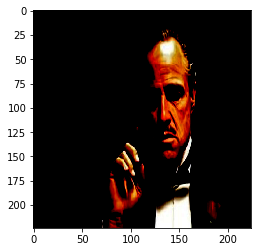

In [33]:
n = 10
sample_image = X_train[n]
final_image = sample_image
print(sample_image.shape)
plt.imshow(sample_image)

### Sample Mask

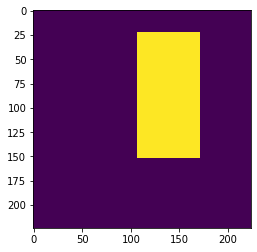

In [34]:
n = 10
sample_mask = masks[n]
final_mask = sample_mask
plt.imshow(sample_mask)

### Predicted Mask

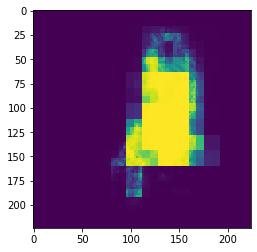

In [35]:
sample_image = np.resize(sample_image, (1, 224, 224, 3))
pred_mask = model.predict(x = sample_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

### Impose the mask on the image (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


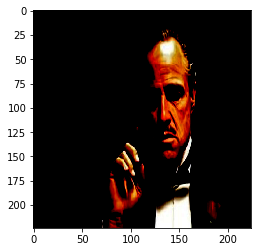

In [36]:
final_pred_mask = np.resize(pred_mask, (224, 224))
final_image = np.resize(sample_image, (224, 224, 3))
plt.imshow(final_image)

### Mask imposed on image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


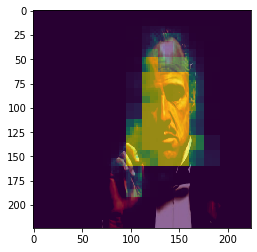

In [37]:
fig = plt.figure()
img_1 = plt.imshow(final_image)
img_2 = plt.imshow(final_pred_mask, alpha = 0.6)
plt.show()

### Image 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of image:  (224, 224, 3)


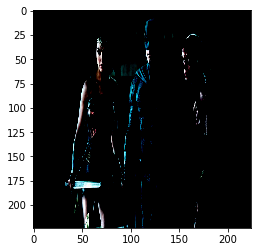

In [26]:
n = 15
sample_image = X_train[n]
final_image = sample_image
print('Shape of image: ', sample_image.shape)
plt.imshow(sample_image)

### Sample Mask

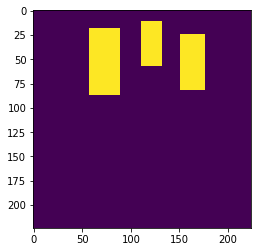

In [27]:
n = 15
sample_mask = masks[n]
final_mask = sample_mask
plt.imshow(sample_mask)

### Predicted Mask

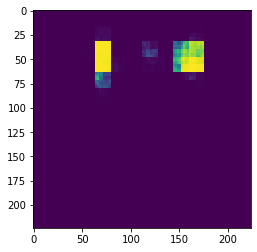

In [28]:
sample_image = np.resize(sample_image, (1, 224, 224, 3))
pred_mask = model.predict(x = sample_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


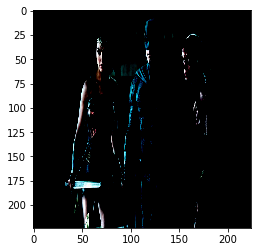

In [29]:
final_pred_mask = np.resize(pred_mask, (224, 224))
final_image = np.resize(sample_image, (224, 224, 3))
plt.imshow(final_image)

### Mask imposed on image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


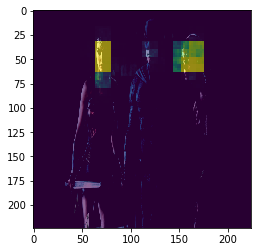

In [31]:
fig = plt.figure()
img_1 = plt.imshow(final_image)
img_2 = plt.imshow(final_pred_mask, alpha = 0.6)
plt.show()

### Conclusion
Project was all about how we can make use of a pretrained MobileNet (Transfer Learning) and on top of it add all the UNET layers to train, fit and evaluate model with an objective to predict the boundaries(mask) around the face in a given image.

  * Model was complied using binary cross entropy as loss, adam optimizer and dice coefficient as metrics.
  * Model checkpoint, early stopping and learning rate reducers were used as callbacks.
  * Data was split into train and validation using 90/10 ratio. Best loss I got is 0.4323 and dice_coefficient of 0.7652 on the training data with just 10 epochs.
  * Model weights for this were used and then used to predict on validation data to get mask.
  * Further checked on sample image and imposed mask on the image.
  * As seen in the above images, it can be seen that model does a very good job in predicting the masks.